In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the data, dividing it into Train set and Test set
data = pd.read_csv('wdbc.csv',header=None)
data2 = data.copy()

train = data2.sample(frac=0.80,random_state=0)
test = data2.drop(train.index)

X = train.iloc[:,2:32].to_numpy()
y = train[1].map({'M':1,'B':0})
y = y.to_numpy()
y = np.asmatrix(y).T

N,p = X.shape 

In [3]:
# Standardization
standardization_data = {}

for i in range(p):
    standardization_data["mean_"+str(i)] = np.mean(X[:,i])
    standardization_data["std_"+str(i)] = np.std(X[:,i])

for i in range(p):
    X[:,i] = ( X[:,i] - standardization_data["mean_"+str(i)] ) / (standardization_data["std_"+str(i)])

In [4]:
# Adding a Column of ones at the begining (Bias element)

one = np.ones(N)
X = np.vstack((one,X.T)).T

The Final Cost is  0.031884608856919336


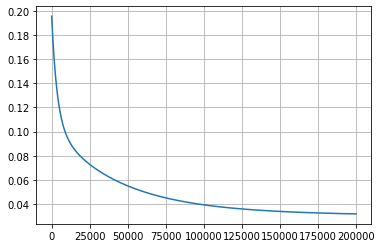

In [5]:
# Gradient Descent
iterations = 200000
alpha = 0.005

#theta = np.array([0.2,-0.6,0.9,0.4,-0.6])
theta = (0.01)*np.random.randn(p+1)
theta = np.asmatrix(theta).T

h_theta = X@theta
costs = np.zeros((iterations,1))
#J = 20
f = 0
for i in range(iterations):
    h_theta = X@theta
    grad = (1/N) * (((h_theta - y).T)@X).T
    
    J = (1/(2*N)) * np.matmul((h_theta - y).T,(h_theta - y))    
    costs[i][0]=J
    
    theta = theta - ((alpha/N) * grad)
    f=f+1

y_pred = X@theta
print("The Final Cost is ",costs[-1,0])
plt.plot(costs)
plt.grid()
plt.show()

In [6]:
# For Testing data

Xt = test.iloc[:,2:32].to_numpy()
yt = test[1].map({'M':1,'B':0})
yt = yt.to_numpy()
yt = np.asmatrix(yt).T

for i in range(p):
    Xt[:,i] = ( Xt[:,i] - standardization_data["mean_"+str(i)] ) / (standardization_data["std_"+str(i)])

# Bias elements
Nt,pt = Xt.shape
one = np.ones(Nt)
Xt = np.vstack((one,Xt.T)).T

y_predtest = Xt@theta

In [7]:
# Finding number of wrong predictions for training set
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

mismatch=0
for i in range(len(y_pred)):
    if y_pred[i] != y[i]:
        mismatch=mismatch+1
        
print("Out of total",N,"training datapoints, ",N-mismatch,"are Predicted correctly")
print("The Accuracy is ",((N-mismatch)/N )*100 )

Out of total 455 training datapoints,  429 are Predicted correctly
The Accuracy is  94.28571428571428


In [8]:
# Finding number of wrong predictions for Test set
#print(y_predtest)
for i in range(len(y_predtest)):
    if y_predtest[i]>0.4:
        y_predtest[i] = 1
    else:
        y_predtest[i] = 0

mismatcht=0
for i in range(len(y_predtest)):
    if y_predtest[i] != yt[i]:
        mismatcht=mismatcht+1
        
print("Out of total",Nt,"test datapoints, ",Nt-mismatcht,"are Predicted correctly")
print("The Accuracy is ",((Nt-mismatcht)/Nt )*100 ) 

Out of total 114 test datapoints,  113 are Predicted correctly
The Accuracy is  99.12280701754386
